In [1]:
import numpy as np
import pandas as pd

# sklearn imports
from sklearn import linear_model
from sklearn import metrics

# helper for logistic regression explanations
from scipy.special import expit
from scipy.special import logit

# visualization libraries 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
df_logistic = pd.read_csv ('df_for_regression_logistic.csv')
df_logistic
df_splitDate = df_logistic.copy()


In [3]:
df_splitDate[['day','month','year']] = df_splitDate['Date'].str.split(".", expand = True)
for i in range(1,10):
    df_splitDate['month']=df_splitDate['month'].str.replace("0"+str(i), str(i))
    df_splitDate['day']=df_splitDate['day'].str.replace("0"+str(i), str(i))
df_splitDate['day'] = df_splitDate['day'].astype(int)
df_splitDate['month'] = df_splitDate['month'].astype(int)
df_splitDate['year'] = df_splitDate['year'].astype(int)

In [4]:
df_splitDate

,Date,Avocado A,Avocado B,Banana A,Banana B,Carrot A,Carrot B,Cucumber A,Cucumber B,Green Apple A,...,Red Pepper B,Sweet-Potato A,Sweet-Potato B,Tomatoe A,Tomatoe B,Yellow Pepper A,Yellow Pepper B,day,month,year
0,03.01.2016,7.60,8.10,2.90,NaN,2.70,NaN,4.60,5.1,NaN,...,8.10,2.70,NaN,9.1,10.10,6.40,7.50,3,1,2016
1,04.01.2016,7.50,10.70,2.90,NaN,2.70,NaN,4.10,4.4,NaN,...,8.80,2.00,NaN,NaN,9.90,6.90,7.30,4,1,2016
2,05.01.2016,8.80,9.60,2.90,NaN,2.60,NaN,3.20,4.4,NaN,...,7.90,2.40,NaN,10.0,10.20,7.30,7.50,5,1,2016
3,06.01.2016,8.80,10.10,2.80,NaN,2.90,NaN,3.50,4.0,5.3,...,7.60,2.10,NaN,8.0,8.40,7.00,7.10,6,1,2016
4,07.01.2016,9.10,10.80,2.80,NaN,2.80,NaN,3.50,4.9,NaN,...,7.70,2.60,NaN,7.7,8.00,6.00,6.90,7,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,20.12.2021,3.00,5.65,2.22,3.49,2.67,4.0,5.89,NaN,NaN,...,5.68,3.00,5.0,3.0,4.50,3.00,5.75,20,12,2021
1123,21.12.2021,3.33,5.85,2.00,3.47,2.50,5.0,6.36,NaN,NaN,...,5.63,2.95,5.0,NaN,4.50,3.25,6.00,21,12,2021
1124,22.12.2021,3.00,6.04,2.00,3.67,2.50,5.0,6.21,NaN,NaN,...,5.86,3.00,5.0,3.0,4.50,3.00,6.06,22,12,2021
1125,23.12.2021,4.00,5.88,2.50,3.31,2.50,5.0,5.92,NaN,NaN,...,5.27,2.95,5.0,NaN,5.06,3.38,5.25,23,12,2021


In [13]:
df_splitDate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Avocado A        453 non-null    float64
 1   Avocado B        559 non-null    float64
 2   Banana A         971 non-null    float64
 3   Banana B         772 non-null    float64
 4   Carrot A         1119 non-null   float64
 5   Carrot B         717 non-null    float64
 6   Cucumber A       1127 non-null   float64
 7   Cucumber B       16 non-null     float64
 8   Green Apple A    523 non-null    float64
 9   Green Apple B    1126 non-null   float64
 10  Green Cabbage A  1127 non-null   float64
 11  Green Cabbage B  9 non-null      float64
 12  Lemon A          1011 non-null   float64
 13  Lemon B          1087 non-null   float64
 14  Letture A        1098 non-null   float64
 15  Letture B        0 non-null      float64
 16  Onion A          690 non-null    float64
 17  Onion B       

# When worthwhile to import each month throughout the years

Text(0, 0.5, 'Avocado')

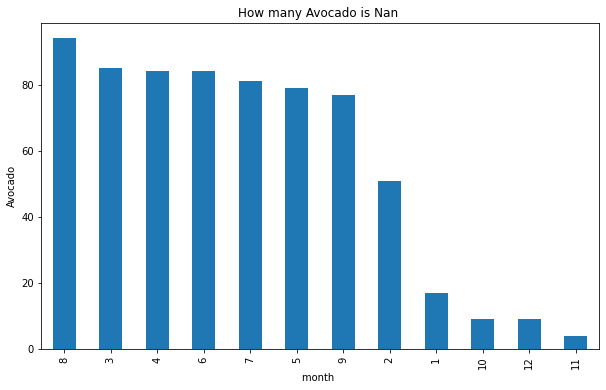

In [12]:
df_splitDate[df_splitDate['Avocado A'].isnull()]['month'].value_counts().plot.bar()
plt.title("How many Avocado is Nan ")
plt.xlabel("month ")
plt.ylabel("Avocado")

Text(0, 0.5, 'Banana ')

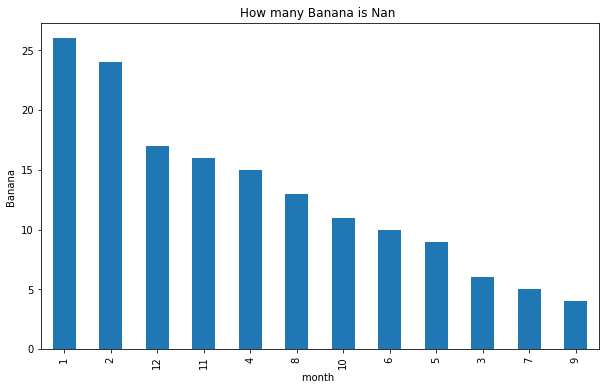

In [8]:
 df_splitDate[df_splitDate['Banana A'].isnull()]['month'].value_counts().plot.bar()
plt.title("How many Banana is Nan ")
plt.xlabel("month ")
plt.ylabel("Banana ")


Text(0, 0.5, 'Green Apple ')

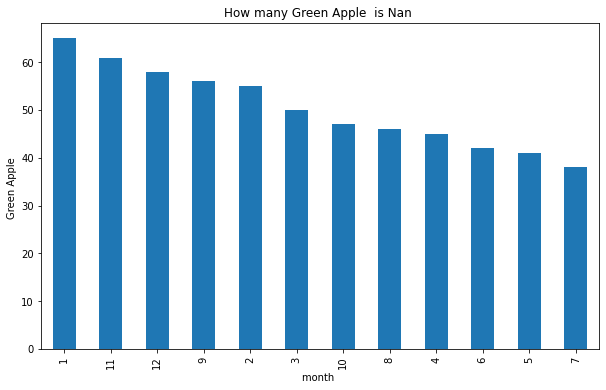

In [15]:
df_splitDate[df_splitDate['Green Apple A'].isnull()]['month'].value_counts().plot.bar()
plt.title("How many Green Apple  is Nan ")
plt.xlabel("month ")
plt.ylabel("Green Apple ")

Text(0, 0.5, 'Pomegranate  ')

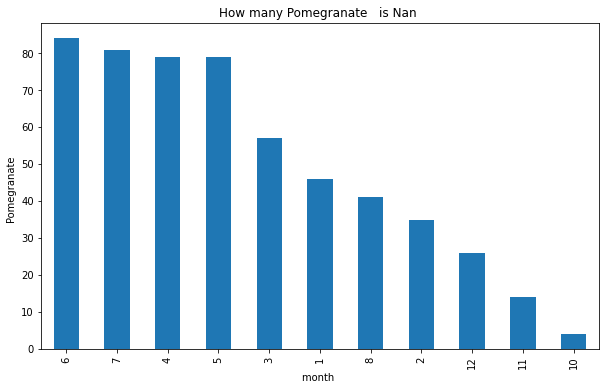

In [16]:
 df_splitDate[df_splitDate['Pomegranate A'].isnull()]['month'].value_counts().plot.bar()
plt.title("How many Pomegranate   is Nan ")
plt.xlabel("month ")
plt.ylabel("Pomegranate  ") 